### DATA SET WITHOUT PREPROCESSING (EDA)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load data from train dataset
data = pd.read_csv('/content/train.csv')

# Check the first few rows to get an understanding of the data
print(data)
print(data.info())
print(data.isnull().sum())



                                    category  \
0      Online and Social Media Related Crime   
1                     Online Financial Fraud   
2                   Online Gambling  Betting   
3      Online and Social Media Related Crime   
4                     Online Financial Fraud   
...                                      ...   
93681                 Online Financial Fraud   
93682                 Online Financial Fraud   
93683                 Online Financial Fraud   
93684  Online and Social Media Related Crime   
93685                 Online Financial Fraud   

                            sub_category  \
0      Cyber Bullying  Stalking  Sexting   
1                      Fraud CallVishing   
2               Online Gambling  Betting   
3                       Online Job Fraud   
4                      Fraud CallVishing   
...                                  ...   
93681     Internet Banking Related Fraud   
93682              EWallet Related Fraud   
93683                 UPI R

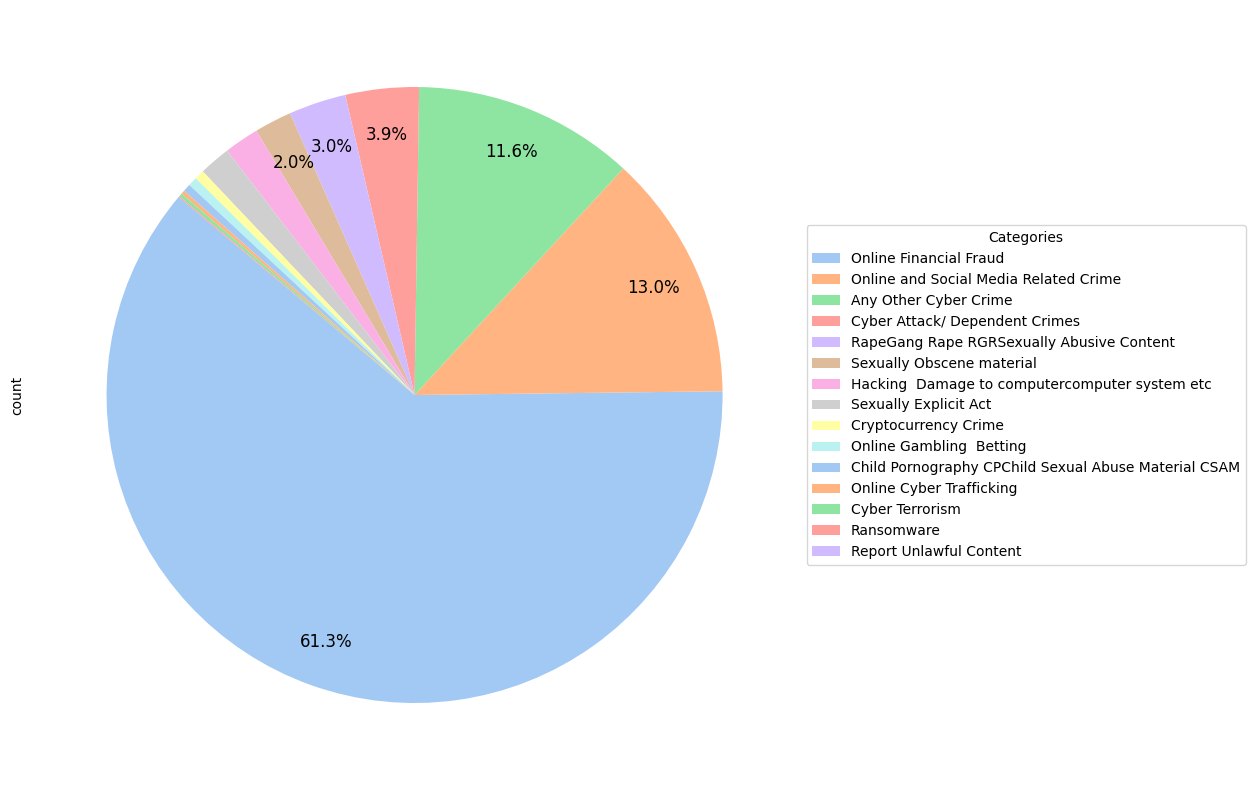

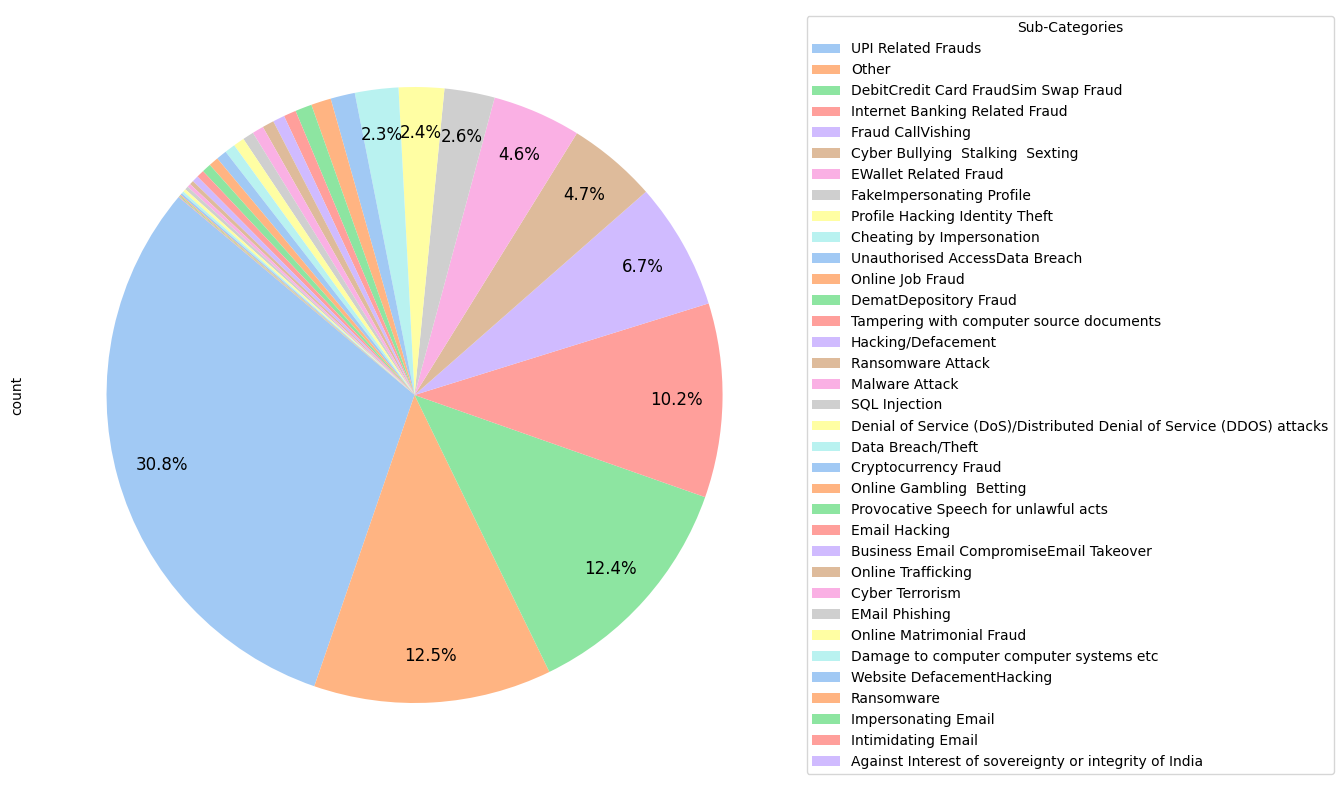

In [ ]:
#This is a function to show percentages only for large slices (i.e larger than 1.9%)
def autopct_function(pct):
    return ('%1.1f%%' % pct) if pct > 1.9 else ''


#Plotting the pie chart for 'category' distribution
plt.figure(figsize=(10, 10))
category_counts = data['category'].value_counts()
palette = sns.color_palette("pastel", len(category_counts))


category_counts.plot.pie(
    autopct=autopct_function,
    startangle=140,
    colors=palette,
    textprops={'fontsize': 12},
    labels=None,
    pctdistance=0.85,
)

plt.legend(
    category_counts.index,
    bbox_to_anchor=(1, 0.5),
    loc="center left",
    title="Categories",
    fontsize=10
)

#Display the plot
plt.show()



#Plotting the pie chart for 'sub_category' distribution
plt.figure(figsize=(10, 10))
sub_category_counts = data['sub_category'].value_counts()
palette = sns.color_palette("pastel", len(sub_category_counts))

sub_category_counts.plot.pie(
    autopct=autopct_function,
    startangle=140,
    colors=palette,
    textprops={'fontsize': 12},
    labels=None,
    pctdistance=0.85,
)

plt.legend(
    sub_category_counts.index,
    bbox_to_anchor=(1, 0.5),
    loc="center left",
    title="Sub-Categories",
    fontsize=10
)

#Display the plot
plt.show()

In [ ]:
#installation of packages
!pip install squarify
!pip install scikit-learn

In [ ]:
#Check if there are any null or non-string values in the column
print(data['crimeaditionalinfo'].isnull().sum())
print(data['crimeaditionalinfo'].apply(type).value_counts())

data['crimeaditionalinfo'] = data['crimeaditionalinfo'].fillna('')
data['crimeaditionalinfo'] = data['crimeaditionalinfo'].astype(str)
data['crimeaditionalinfo'] = data['crimeaditionalinfo'].fillna('')
data['crimeaditionalinfo'] = data['crimeaditionalinfo'].astype(str)

21
crimeaditionalinfo
<class 'str'>      93665
<class 'float'>       21
Name: count, dtype: int64


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the vectorizer with stop words
vectorizer = CountVectorizer(stop_words='english', max_features=20)

# Ensure the column is clean and converted to a list of strings
X = vectorizer.fit_transform(data['crimeaditionalinfo'].values.astype('U'))

# Get the frequencies of the top 20 most frequent words
words_freq = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Sum up the word frequencies
word_counts = words_freq.sum(axis=0).sort_values(ascending=False)

# Show top 20 most frequent words
print(word_counts)


account      56470
bank         44069
fraud        39562
number       39144
money        33217
rs           28945
total        26036
phone        23695
pay          23235
card         22958
got          21876
id           18259
loan         15913
action       15901
app          15896
help         15529
asked        14884
person       14473
details      14096
complaint    14084
dtype: int64


In [ ]:
# Add columns for text length and character count
data['text_length'] = data['crimeaditionalinfo'].apply(lambda x: len(x.split()))
data['char_count'] = data['crimeaditionalinfo'].apply(lambda x: len(x))

print(data[['text_length', 'char_count']].describe())

# Check for complaints with unusually short or long text
print(data[data['text_length'] > 500].head())
print(data[data['text_length'] < 5].head())

        text_length    char_count
count  84089.000000  84089.000000
mean      65.670468    365.954893
std       52.821773    280.931450
min        1.000000      3.000000
25%       33.000000    198.000000
50%       50.000000    275.000000
75%       83.000000    457.000000
max      370.000000   1517.000000
Empty DataFrame
Columns: [category, sub_category, crimeaditionalinfo, cleaned_crime_info, text_length, char_count]
Index: []
                  category                    sub_category  \
4   Online Financial Fraud  Internet Banking Related Fraud   
27  Online Financial Fraud              UPI Related Frauds   
48  Online Financial Fraud              UPI Related Frauds   
54  Online Financial Fraud               Fraud CallVishing   
62  Online Financial Fraud              UPI Related Frauds   

                                   crimeaditionalinfo cleaned_crime_info  \
4                                FINANCIAL FRAUD  RS     financial fraud   
27                                          

In [ ]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.model_selection import train_test_split
from textblob import TextBlob
from collections import Counter
import squarify
from sklearn.feature_extraction.text import CountVectorizer

Initial Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93686 entries, 0 to 93685
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   category            93686 non-null  object
 1   sub_category        87095 non-null  object
 2   crimeaditionalinfo  93665 non-null  object
dtypes: object(3)
memory usage: 2.1+ MB

Dataset Summary:



<ipython-input-9-59b40ac0f122>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sub_category'].fillna('Unknown', inplace=True)
<ipython-input-9-59b40ac0f122>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

                      category        sub_category  \
count                    93686               93686   
unique                      15                  36   
top     Online Financial Fraud  UPI Related Frauds   
freq                     57434               26856   

                                       crimeaditionalinfo  
count                                               93686  
unique                                              84632  
top     respected sir\r\n\r\na very serious matter i w...  
freq                                                 2342  

Missing Values:
 category              0
sub_category          0
crimeaditionalinfo    0
dtype: int64


<ipython-input-9-59b40ac0f122>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='category', order=df['category'].value_counts().index, palette='viridis')


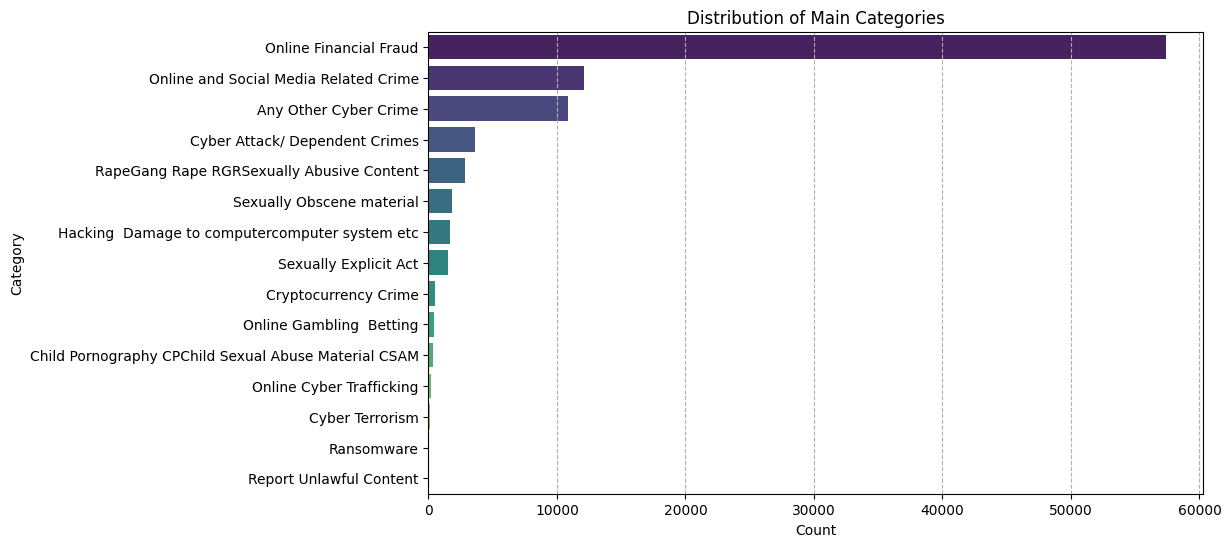

In [ ]:
#Load the dataset
df = pd.read_csv('/content/train.csv')

print("Initial Data Information:")
df.info()

#Data Preprocessing
#Fill missing values
df['sub_category'].fillna('Unknown', inplace=True)
df['crimeaditionalinfo'].fillna('No Info', inplace=True)

#Convert text to lowercase for consistency
df['crimeaditionalinfo'] = df['crimeaditionalinfo'].str.lower()

#Descriptive Statistics
print("\nDataset Summary:\n")
print(df.describe(include='all'))
print("\nMissing Values:\n", df.isnull().sum())

#Category Distribution Visualization
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='category', order=df['category'].value_counts().index, palette='viridis')
plt.title('Distribution of Main Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.grid(axis='x', linestyle='--')
plt.show()

<ipython-input-10-722e9d3672ed>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='sub_category', order=df['sub_category'].value_counts().index[:15], palette='plasma')


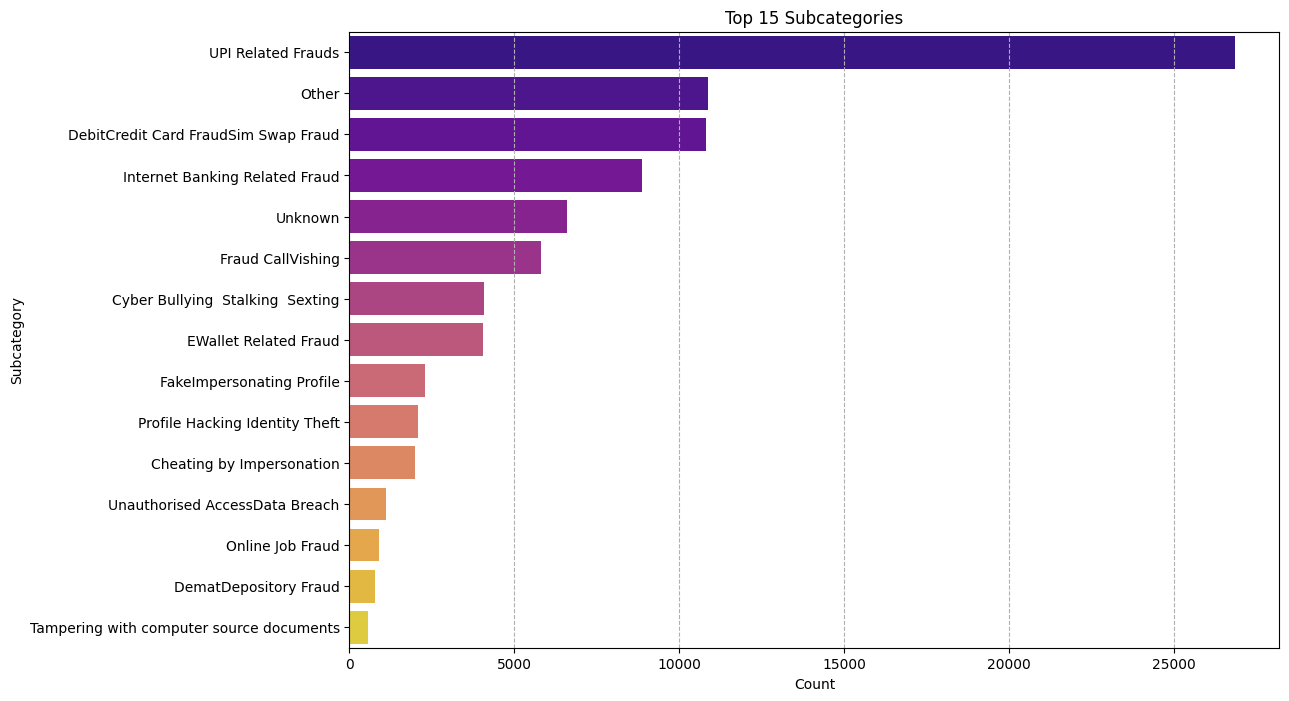

In [ ]:
#Subcategory Analysis
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='sub_category', order=df['sub_category'].value_counts().index[:15], palette='plasma')
plt.title('Top 15 Subcategories')
plt.xlabel('Count')
plt.ylabel('Subcategory')
plt.grid(axis='x', linestyle='--')
plt.show()

### DATA SET WITH PREPROCESSING (EDA)

In [ ]:
!pip install -U scikit-learn

In [ ]:
#Import necessary packages
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import IsolationForest
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Load the dataset
file_path = '/content/cleaned_data.csv'
data = pd.read_csv(file_path)

In [ ]:
#Setting up the visual style for the plots using seaborn package
sns.set(style='whitegrid')

In [ ]:
#This is a function to plot the distribution of sub-categories within each main category
def plot_subcategory_distribution(df):
    main_categories = df['category'].unique()

    # Create subplots for each main category
    plt.figure(figsize=(15, len(main_categories) * 5))

    for idx, category in enumerate(main_categories):
        # Filter data for the current main category
        sub_df = df[df['category'] == category]

        # Plot the sub-category distribution
        plt.subplot(len(main_categories), 1, idx + 1)
        sns.barplot(
            x='percentage', y='sub_category', data=sub_df, palette='viridis', order=sub_df['sub_category']
        )
        plt.title(f"Sub-category Distribution for {category}", fontsize=14)
        plt.xlabel('Percentage')
        plt.ylabel('Sub-category')
        plt.xlim(0, 100)
        plt.grid(True)

    plt.tight_layout()
    plt.show()

<ipython-input-15-5e55856d523f>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-15-5e55856d523f>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-15-5e55856d523f>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-15-5e55856d523f>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-15-5e55856d523f>:14: FutureWarning: 

Passing `pa

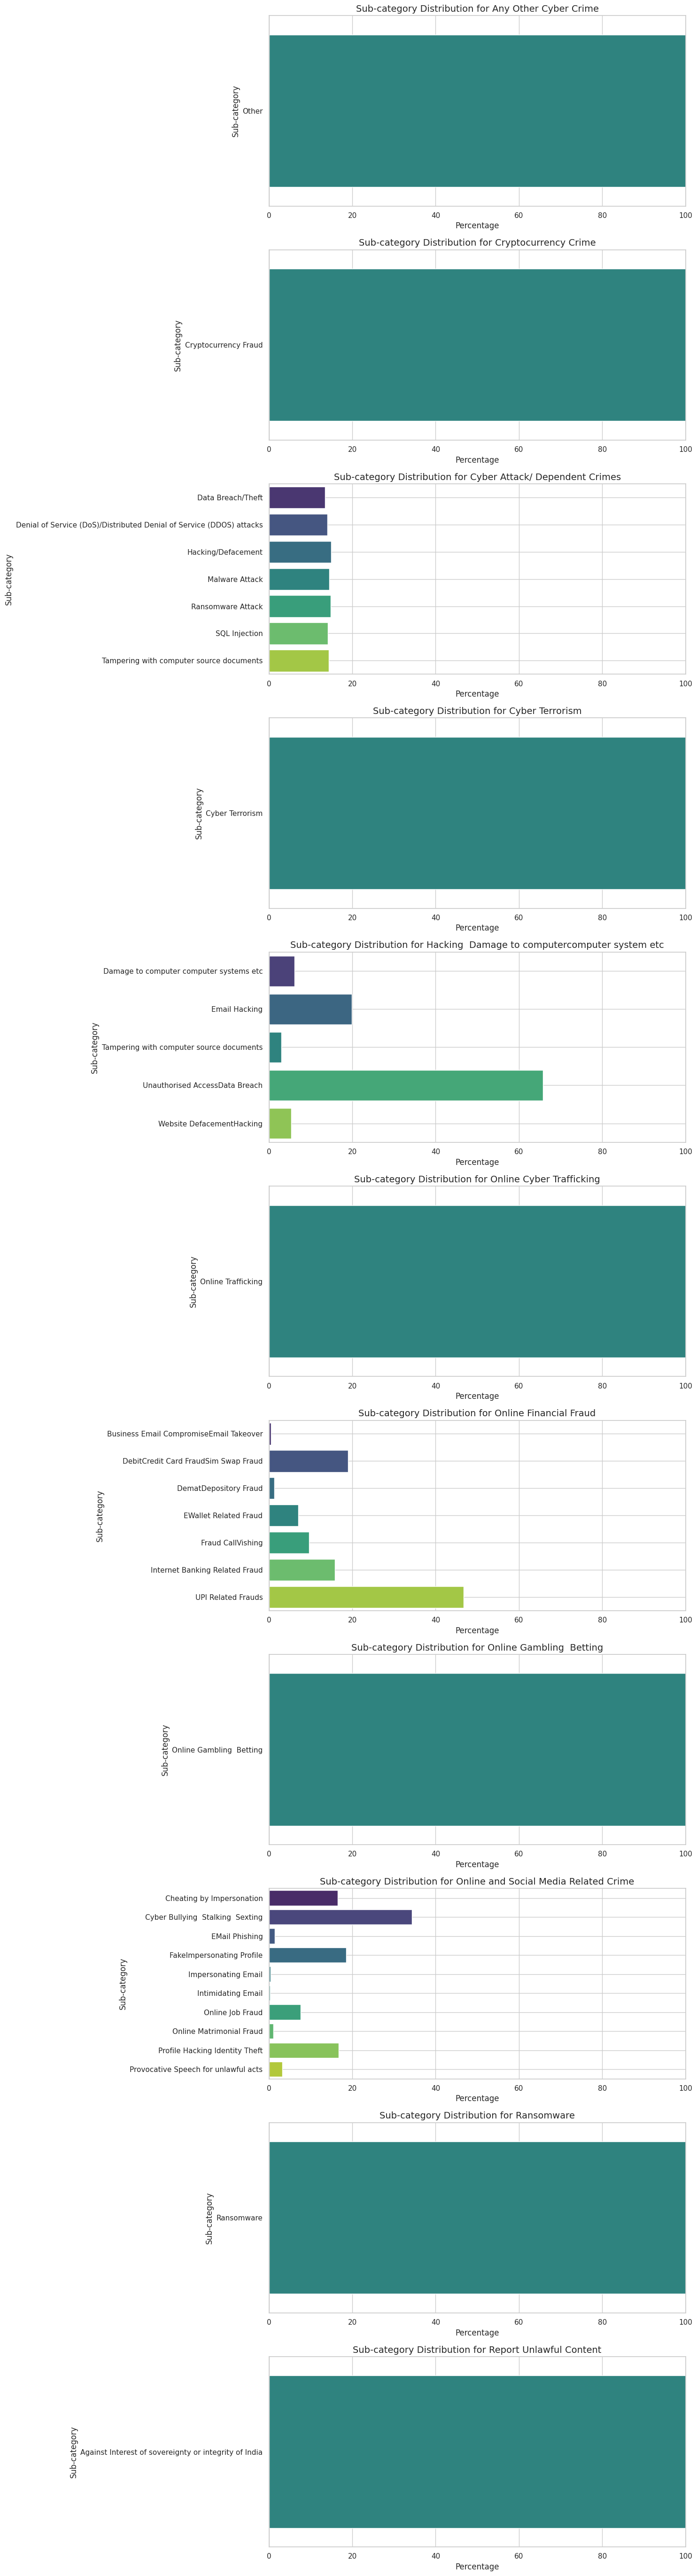

In [ ]:
#Calculation of count and percentage for sub-categories within each main category
category_counts = data.groupby(['category', 'sub_category']).size().reset_index(name='count')
total_counts = category_counts.groupby('category')['count'].transform('sum')
category_counts['percentage'] = (category_counts['count'] / total_counts) * 100

plot_subcategory_distribution(category_counts)

In [ ]:
sns.set(style='whitegrid')

In [ ]:
#Identification main categories with multiple sub-categories
subcategory_counts = data.groupby('category')['sub_category'].nunique().reset_index()
subcategory_counts.columns = ['category', 'unique_subcategory_count']

<ipython-input-19-c78de4ca87c9>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-19-c78de4ca87c9>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-19-c78de4ca87c9>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-19-c78de4ca87c9>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


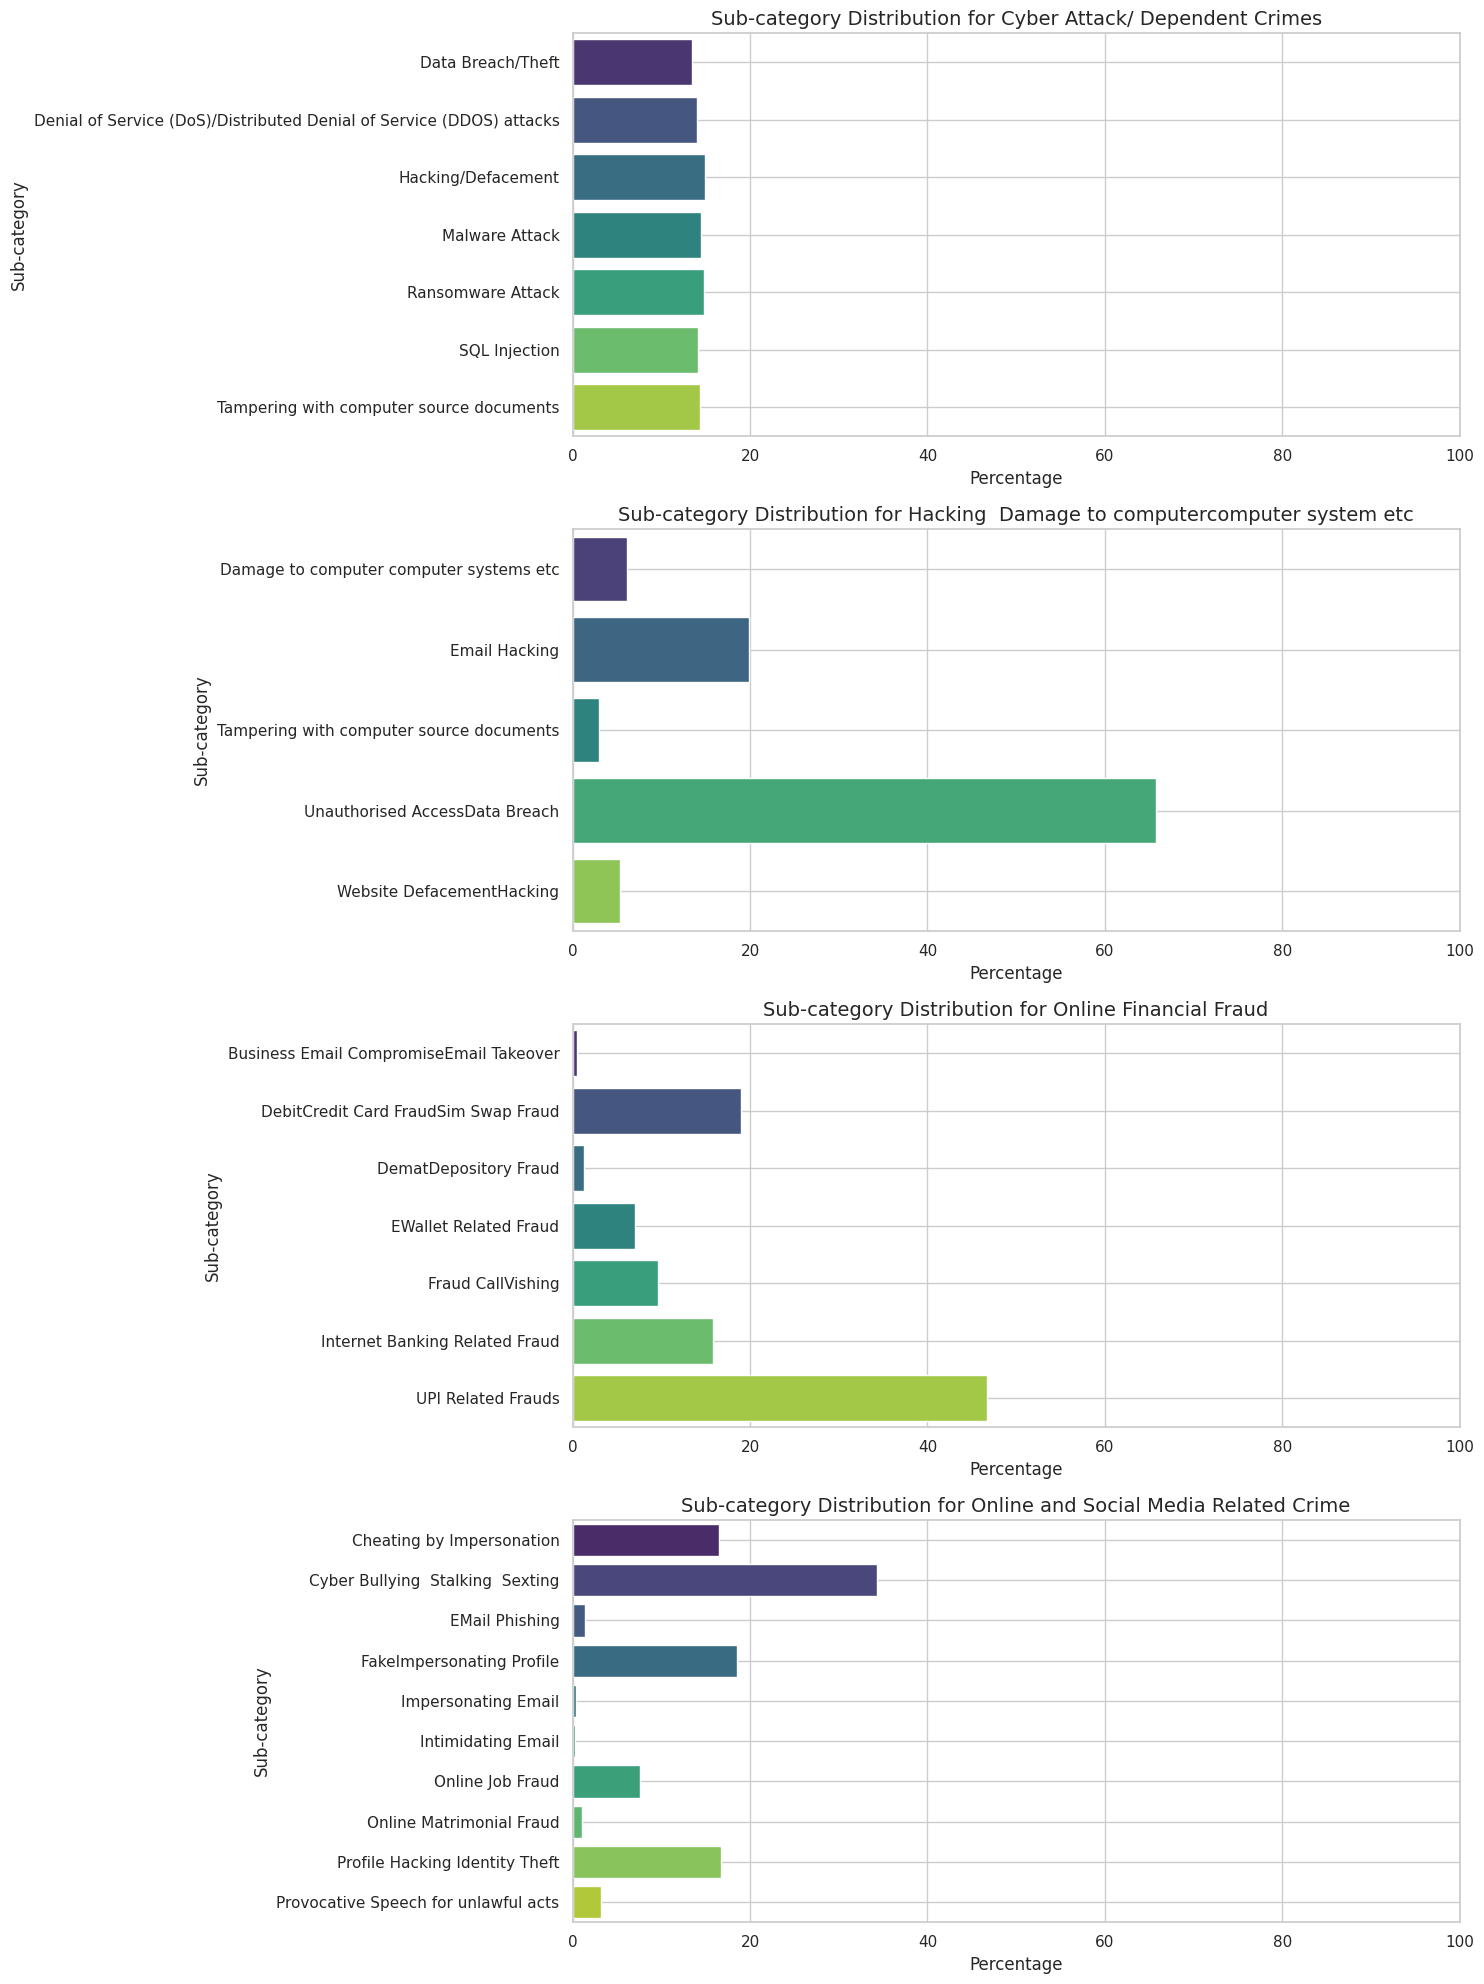

In [ ]:
#Filter to include only categories with more than one sub-category
multiple_subcategory_categories = subcategory_counts[subcategory_counts['unique_subcategory_count'] > 1]['category']
filtered_data = data[data['category'].isin(multiple_subcategory_categories)]

#Calculation of count and percentage for sub-categories within each main category
filtered_category_counts = filtered_data.groupby(['category', 'sub_category']).size().reset_index(name='count')
total_filtered_counts = filtered_category_counts.groupby('category')['count'].transform('sum')
filtered_category_counts['percentage'] = (filtered_category_counts['count'] / total_filtered_counts) * 100

#This is a function to plot the distribution of sub-categories within each main category
def plot_subcategory_distribution(df):
    main_categories = df['category'].unique()
    plt.figure(figsize=(15, len(main_categories) * 5))

    for idx, category in enumerate(main_categories):
        sub_df = df[df['category'] == category]
        plt.subplot(len(main_categories), 1, idx + 1)
        sns.barplot(
            x='percentage', y='sub_category', data=sub_df, palette='viridis', order=sub_df['sub_category']
        )
        plt.title(f"Sub-category Distribution for {category}", fontsize=14)
        plt.xlabel('Percentage')
        plt.ylabel('Sub-category')
        plt.xlim(0, 100)
        plt.grid(True)

    plt.tight_layout()
    plt.show()

#Plotting the EDA for the filtered significant sub-categories with multiple subcategories
plot_subcategory_distribution(filtered_category_counts)